Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.7081 - loss: 0.9288 - val_accuracy: 0.6667 - val_loss: 0.9749
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6868 - loss: 0.9409 - val_accuracy: 0.6667 - val_loss: 0.9594
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7494 - loss: 0.9097 - val_accuracy: 0.6667 - val_loss: 0.9446
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7249 - loss: 0.8922 - val_accuracy: 0.6667 - val_loss: 0.9301
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7405 - loss: 0.8809 - val_accuracy: 0.7500 - val_loss: 0.9163
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7552 - loss: 0.8580 - val_accuracy: 0.7500 - val_loss: 0.9033
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7312 - loss: 0.8439 - val_accuracy: 0.8333 - val_loss: 0.8916
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7437 - loss: 0.8473 - val_accuracy: 0.8333 - val_loss

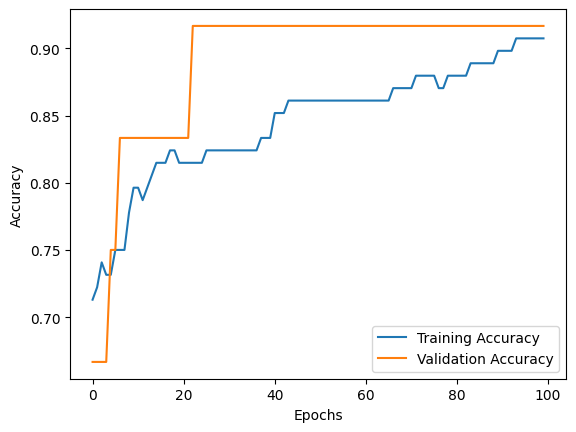

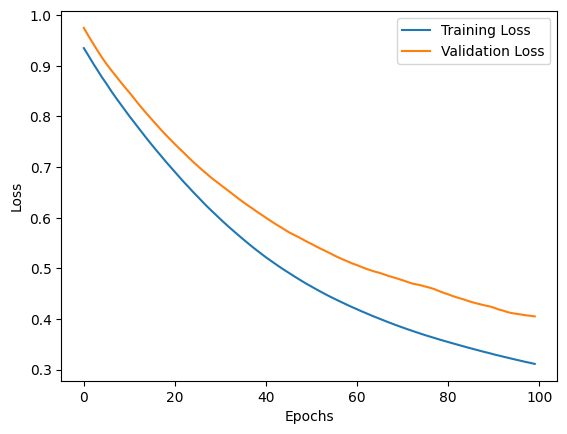

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[1.02462694e-01 5.54269433e-01 3.43267858e-01]
 [9.28844452e-01 5.31301871e-02 1.80253554e-02]
 [1.75585912e-04 6.79062754e-02 9.31918204e-01]
 [5.48425205e-02 4.88116980e-01 4.57040459e-01]
 [3.57789956e-02 5.10429025e-01 4.53791976e-01]
 [8.90814304e-01 7.86445141e-02 3.05411387e-02]
 [2.31275767e-01 5.71876287e-01 1.96847856e-01]
 [1.21013762e-03 1.12142660e-01 8.86647165e-01]
 [4.98842709e-02 6.74029768e-01 2.76086032e-01]
 [1.61138192e-01 6.19075835e-01 2.19785988e-01]
 [4.17806907e-03 1.39832735e-01 8.55989277e-01]
 [9.01103973e-01 8.61917511e-02 1.27042094e-02]
 [9.19227958e-01 5.88666163e-02 2.19053812e-02]
 [9.16546643e-01 7.04397932e-02 1.30135044e-02]
 [9.74468708e-01 1.97656173e-02 5.76567836e-03]
 [2.83342805e-02 3.03243488e-01 6.68422222e-01]
 [1.10244332e-03 6.82929233e-02 9.30604577e-01]
 [1.28822595e-01 7.05251992e-01 1.65925458e-01]
 [1.08027577e-01 5.96457243e-01 2.95515209e-01]
 [1.79147744e-03 1.19490616e-01 8.78717840e-01]
 [

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Task 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert the labels to categorical one-hot encoding
y = to_categorical(y)

# Task 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 3: Use StandardScaler() to scale the data
# First fit the scaling transformation on the train set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Next, apply the transformation to the test set
X_test = scaler.transform(X_test)

# Create a neural network model
model = keras.Sequential([
    layers.Input(shape=(4,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create a history object to store training history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Plot training accuracy vs. validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training loss vs. validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Use the model to predict X_test, and print the output
predictions = model.predict(X_test)
print(predictions)




# In Keras, a Dense layer is a fully connected neural network layer. This means that each neuron in the layer receives input from all neurons in the previous layer. It's one of the most common layers used in neural networks. Here’s what each part means:

# Dense(8, activation='relu'):
# 8: This is the number of neurons in this layer. Each neuron will be connected to every neuron in the previous layer.
# activation='relu': This specifies the activation function used by the neurons in this layer. ReLU stands for Rectified Linear Unit, which is a commonly used activation function that introduces non-linearity into the model. The relu function outputs the input directly if it is positive; otherwise, it outputs zero. Mathematically, it is defined as:
# ReLU(x)=max(0,x)
# This helps the model to learn more complex patterns by introducing non-linearity.

# Dense(3, activation='softmax'):
# 3: This is the number of neurons in this layer. It implies that this layer will output three values, often used for classification tasks where you have three classes.
# activation='softmax': This is the activation function used in this layer. The softmax function is commonly used in the output layer for classification problems. It converts the raw output scores of the model into probabilities. The probabilities will sum to 1, which makes it easier to interpret the model's output. Mathematically, for an output vector z with elements Zi, the softmax function is defined.
# This helps in assigning a probability to each class.




# Summary of the Model
# Input layer: The model expects an input with a shape of (4,). This means the input data should be a vector of four elements.
# First Dense layer: This layer has 8 neurons and uses the ReLU activation function. It takes the input of 4 elements and processes it to produce 8 outputs.
# Second Dense layer: This layer has 3 neurons and uses the softmax activation function. It takes the 8 outputs from the previous layer and processes them to produce 3 outputs, which can be interpreted as probabilities for each class in a classification task.

#  Here's how the model processes an input step by step:
# Input Layer: Receives a 4-dimensional input vector.
# First Dense Layer: Transforms the 4-dimensional input to an 8-dimensional output using weights and the ReLU activation function.
# Second Dense Layer: Transforms the 8-dimensional output to a 3-dimensional output using weights and the softmax activation function, producing a probability distribution over three classes.
# This structure is typically used for a simple classification problem with three possible output classes.


#########################################################3333

# MORE COMPLEX MODEL
# enhance the neural network model by adding more layers and neurons, and experimenting with
# different activation functions. Here's a slightly more complex model that might perform better:
# more layers, dropout to prevent overfitting

# Dropout layers: Added dropout layers with a dropout rate of 0.3
# to prevent overfitting by randomly dropping neurons during training.


# model = keras.Sequential([
#     layers.Input(shape=(4,)),
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(32, activation='relu'),
#     layers.Dropout(0.3),
#     layers.Dense(16, activation='relu'),
#     layers.Dense(3, activation='softmax')
# ])
